In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import klib
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv("sleep75.csv", usecols=["age", "educ", "male", "inlf", "sleep", "slpnaps", "totwrk", "selfe", "marr", "gdhlth"])
df

,age,educ,gdhlth,inlf,male,marr,selfe,sleep,slpnaps,totwrk
0,32,12,0,1,1,1,0,3113,3163,3438
1,31,14,1,1,1,0,1,2920,2920,5020
2,44,17,1,1,1,1,1,2670,2760,2815
3,30,12,1,1,0,1,1,3083,3083,3786
4,64,14,1,1,1,1,0,3448,3493,2580
...,...,...,...,...,...,...,...,...,...,...
701,45,12,1,0,0,1,0,2985,3385,2026
702,34,10,0,0,1,1,0,3520,3535,675
703,37,12,1,0,0,1,0,3510,3510,1851
704,54,17,1,0,0,1,1,2970,3000,1961


In [65]:
df.describe()

,age,educ,gdhlth,inlf,male,marr,selfe,sleep,slpnaps,totwrk
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.00000,706.000000,706.000000,706.000000,706.000000
mean,38.815864,12.780453,0.890935,0.753541,0.566572,0.82153,0.131728,3266.355524,3383.083569,2122.920680
std,11.342637,2.784702,0.311942,0.431254,0.495900,0.38318,0.338435,444.413448,499.046930,947.470123
min,23.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,755.000000,1335.000000,0.000000
25%,29.000000,12.000000,1.000000,1.000000,0.000000,1.00000,0.000000,3015.000000,3105.750000,1553.500000
50%,36.000000,12.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3270.500000,3369.000000,2288.000000
75%,48.000000,16.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3532.250000,3655.000000,2691.750000
max,65.000000,17.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4695.000000,6110.000000,6415.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      706 non-null    int64
 1   educ     706 non-null    int64
 2   gdhlth   706 non-null    int64
 3   inlf     706 non-null    int64
 4   male     706 non-null    int64
 5   marr     706 non-null    int64
 6   selfe    706 non-null    int64
 7   sleep    706 non-null    int64
 8   slpnaps  706 non-null    int64
 9   totwrk   706 non-null    int64
dtypes: int64(10)
memory usage: 55.3 KB


In [67]:
X = df.drop(columns='gdhlth')
y = df["gdhlth"]

In [68]:
X

,age,educ,inlf,male,marr,selfe,sleep,slpnaps,totwrk
0,32,12,1,1,1,0,3113,3163,3438
1,31,14,1,1,0,1,2920,2920,5020
2,44,17,1,1,1,1,2670,2760,2815
3,30,12,1,0,1,1,3083,3083,3786
4,64,14,1,1,1,0,3448,3493,2580
...,...,...,...,...,...,...,...,...,...
701,45,12,0,0,1,0,2985,3385,2026
702,34,10,0,1,1,0,3520,3535,675
703,37,12,0,0,1,0,3510,3510,1851
704,54,17,0,0,1,1,2970,3000,1961


In [69]:
y

0      0
1      1
2      1
3      1
4      1
      ..
701    1
702    0
703    1
704    1
705    1
Name: gdhlth, Length: 706, dtype: int64

# EDA (Data Exploration)

### Description

1- Clean data

2- modify data types

3- plot exploring plots (pairplot, box plots, etc.)

In [70]:
#checking missing values
df.isnull().sum()

age        0
educ       0
gdhlth     0
inlf       0
male       0
marr       0
selfe      0
sleep      0
slpnaps    0
totwrk     0
dtype: int64

In [71]:
df.shape

(706, 10)

In [72]:
#data cleaning(adjust data types, drop duplicates& empty rows/cols
df_clean = klib.data_cleaning(df)

Shape of cleaned data: (706, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-80.0%)



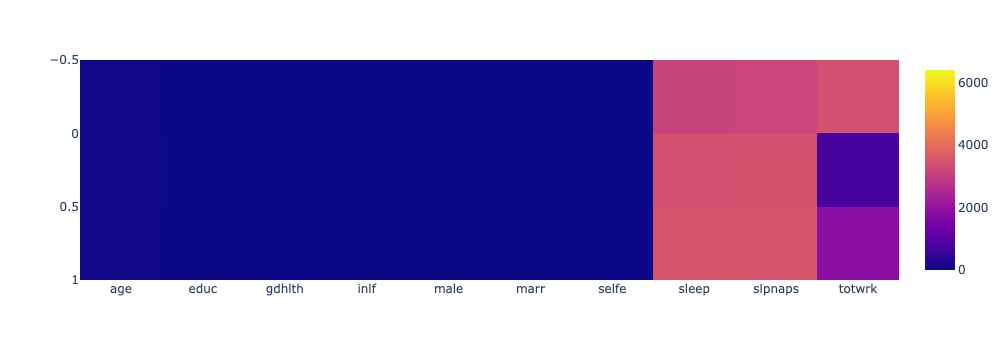

In [73]:
##heatmap 1
fig = px.imshow(df)
fig = px.imshow(df, x=df.columns, y= y)
fig.show()

In [74]:
klib.cat_plot(df)

No columns with categorical data were detected.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

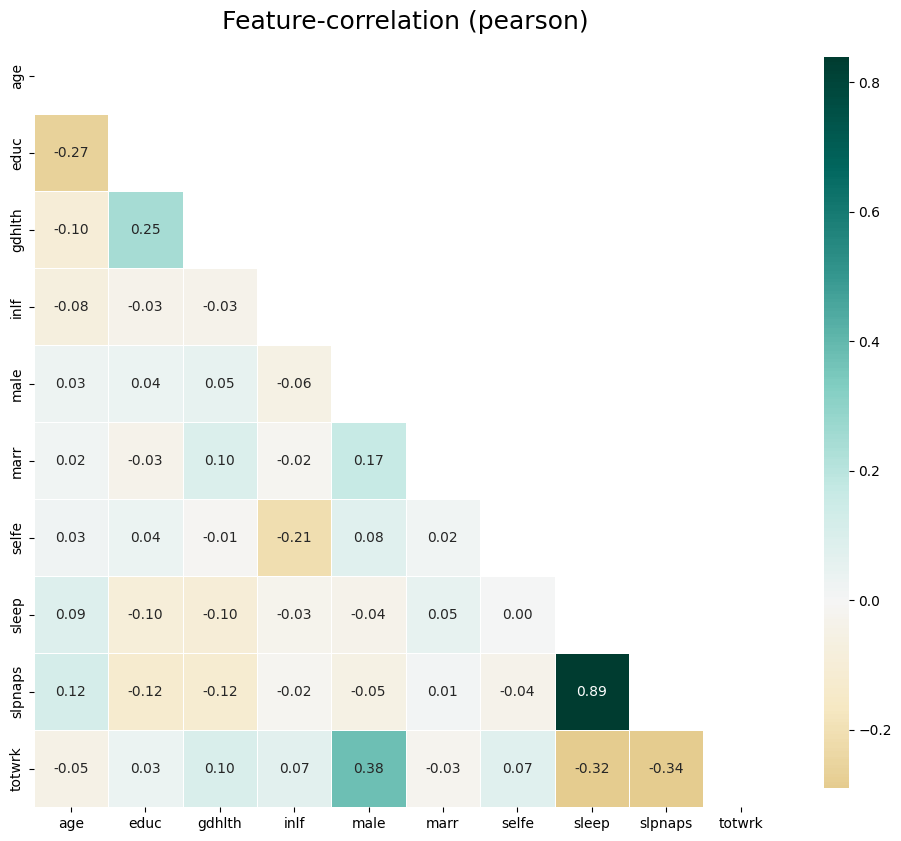

In [75]:
##heatmap(correlation)
klib.corr_plot(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='age', ylabel='Density'>

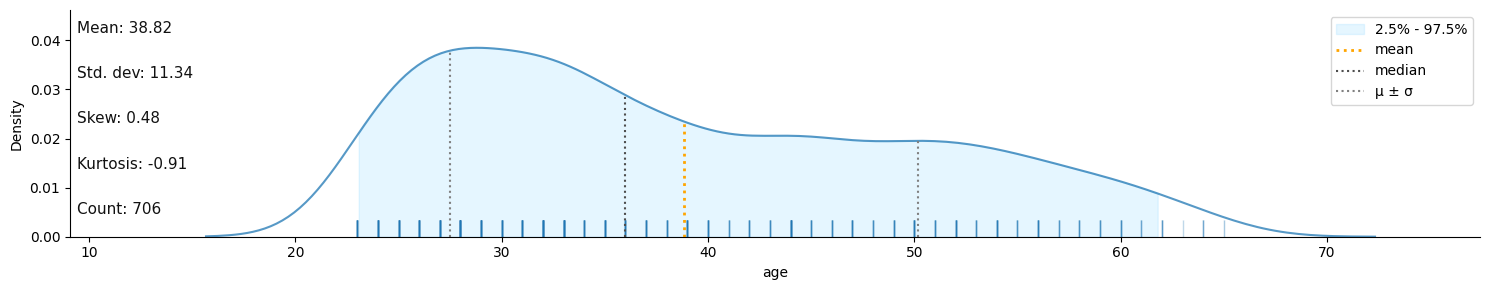

In [76]:
klib.dist_plot(df['age'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='educ', ylabel='Density'>

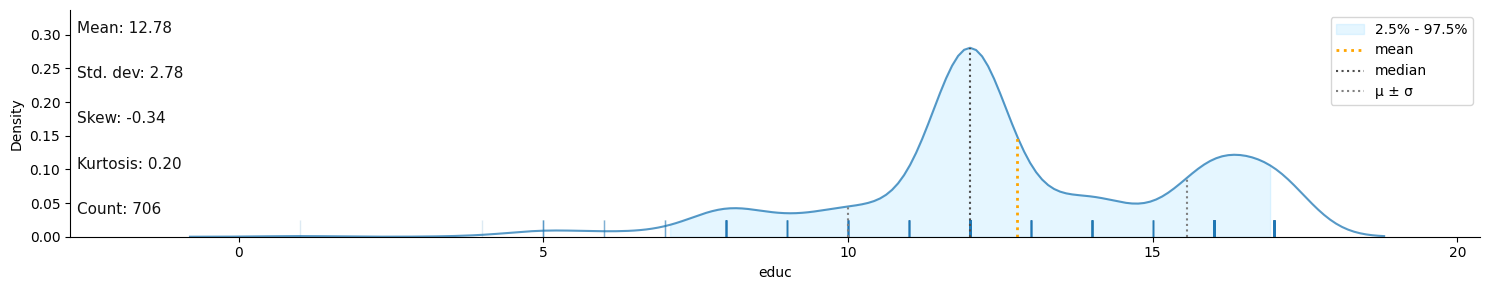

In [77]:
klib.dist_plot(df['educ'])

# Assumptions (Tests)

### Description:

Check week 7

genrally:

1- check for variable normality

2- check for independence

# Data Preprocessing (Encoding)

### Description 
1- Standarize data

2- Normalize data

3- feature expansion (feature genration)

# Model Training and Prediction

### Description

1- train model

2- cross-validation

3- gridsearch (hyperparameter tuning)

4- plots of results

In [78]:
#train model
criterion = lambda formula, df: smf.logit(formula, data=df).fit().aic

In [79]:
def add(df, selected_columns, columns, criterion):
    best_criterion = np.inf
    best_column = None
    for column in columns - selected_columns:
        new_columns = selected_columns.union({column})
        formula = f'y ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < best_criterion:
            best_criterion = current_criterion
            best_column = column
    return selected_columns.union({best_column}), best_criterion

In [80]:
def forward(df, criterion):
    selected_columns = set()
    columns = set(X.columns)
    best_criterion = np.inf
    while len(selected_columns) < len(columns):
        potential_columns, current_criterion = add(df, selected_columns, columns, criterion)
        if current_criterion > best_criterion:
            break
        else:
            selected_columns = potential_columns
            best_criterion = current_criterion
    return selected_columns

In [81]:
selected_columns = forward(df, criterion)

Optimization terminated successfully.
         Current function value: 0.339061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315347
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344491
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339297
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.343237
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.337346
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339598
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.344047
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312808
  

In [82]:
selected_columns

{'educ', 'marr', 'slpnaps', 'totwrk'}

In [83]:
formula = 'gdhlth ~ educ + marr + slpnaps + totwrk'
logistic_model = smf.logit(formula, data=df).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.304748
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 gdhlth   No. Observations:                  706
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.1155
Time:                        20:00:02   Log-Likelihood:                -215.15
converged:                       True   LL-Null:                       -243.26
Covariance Type:            nonrobust   LLR p-value:                 1.812e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9026      1.244     -0.725      0.468      -3.341       1.536
educ           0.2664      0.

In [84]:
#cross validation
train, test = train_test_split(df, test_size = 0.2, random_state = 1)
train.shape, test.shape

((564, 10), (142, 10))

In [85]:
yhat_test = logistic_model.predict(test)
error = np.sum((test['gdhlth'] - yhat_test) ** 2)
error

14.08140906209286

In [86]:
#gridsearch

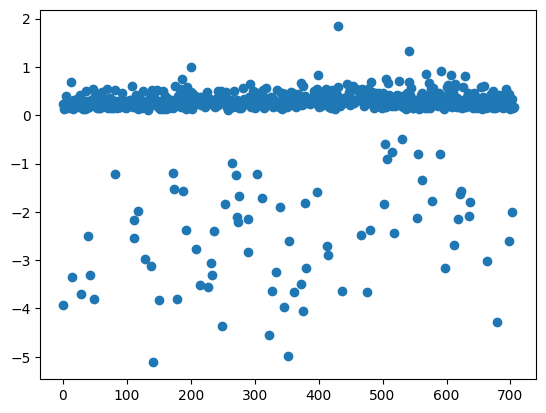

In [87]:
#plots of results
fitted = logistic_model.fittedvalues
residuals = logistic_model.resid_pearson
plt.scatter(range(len(residuals)), residuals)

In [88]:
threshold = 0.5
while True:
    c_matrix = logistic_model.pred_table(threshold=threshold)
    error_rate = c_matrix[0, 1] / c_matrix[0].sum() + c_matrix[1, 0] / c_matrix[1].sum()
    c_matrix_increase = logistic_model.pred_table(threshold=threshold+0.01)
    error_rate_increase = c_matrix_increase[0, 1] / c_matrix_increase[0].sum() + c_matrix_increase[1, 0] / c_matrix_increase[1].sum()
    c_matrix_decrease = logistic_model.pred_table(threshold=threshold-0.01)
    error_rate_decrease = c_matrix_decrease[0, 1] / c_matrix_decrease[0].sum() + c_matrix_decrease[1, 0] / c_matrix_decrease[1].sum()
    if error_rate_decrease<error_rate and error_rate_decrease<=error_rate_increase: 
        threshold = threshold-0.001
    elif error_rate_increase<error_rate: 
        threshold = threshold+0.001
    else:
        break
c_matrix, threshold

(array([[  7.,  70.],
        [  3., 626.]]),
 0.5)

In [91]:
!git push https://github.com/ahmostafa147/Math189-project.git

Everything up-to-date
